In [1]:
file_path='C:/Users/Tewatia/Downloads/Airbnb NYC 2019.csv'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_main=pd.read_csv(file_path)

# Data Cleaning

In [4]:
df_main.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Here name and host_name are having small fraction of null rows.we can ignore this data.

In [5]:
df_main=df_main.loc[df_main['host_name'].notnull()]

In [6]:
df_main=df_main.loc[df_main['name'].notnull()]

In [8]:
df_main=df_main.loc[df_main['price']!=0]

# Analysis 1- Which neighbourhood group have how many listings

In [9]:
listings_per_neighboorhood_group=df_main.groupby(['neighbourhood_group'])['id'].count()

<AxesSubplot:title={'center':'Listings per Neighbourhood Group'}, xlabel='Neighbourhood Group', ylabel='Number of Listings'>

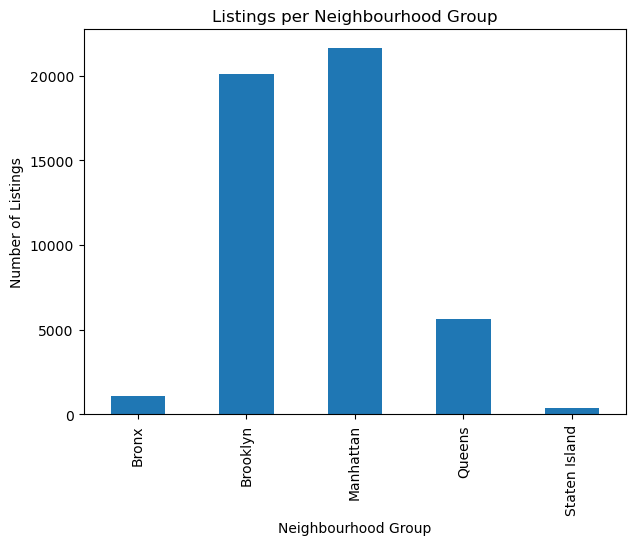

In [10]:
listings_per_neighboorhood_group.plot(kind='bar',figsize=(7,5),title='Listings per Neighbourhood Group',xlabel='Neighbourhood Group',ylabel='Number of Listings')

# Conclusion 1: Highest number of listings are in Manhattan and Brooklyn respectively where as staten island and Bronx are having minimum listings

# Analysis 2- What is average price in different nighboorhood groups for different types of rooms

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

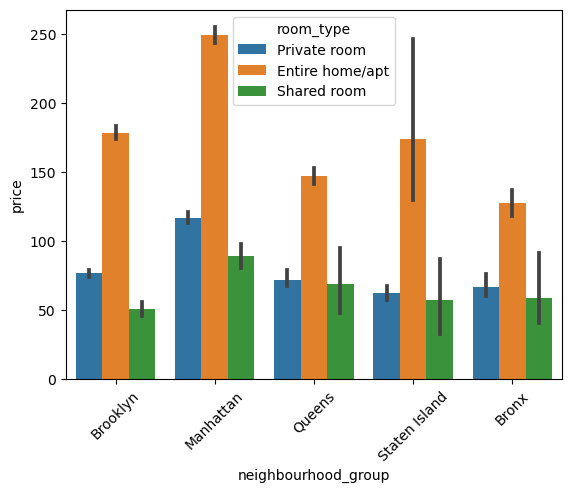

In [17]:
plt.xticks(rotation=45)
sns.barplot(x='neighbourhood_group',y='price',hue='room_type',data=df_main)

# Conclusion 2: Average room price are highest in Manhattan. Average prices for  rest of neighbourhoods are somewhat similar.

# Analysis 3- What is mean price range in different nighboorhood groups

In [14]:
price_per_listing_df=df_main.groupby(['price','neighbourhood_group'])['price'].mean().unstack()

<AxesSubplot:title={'center':'Price average per Neighbourhood Group'}, ylabel='Average Price'>

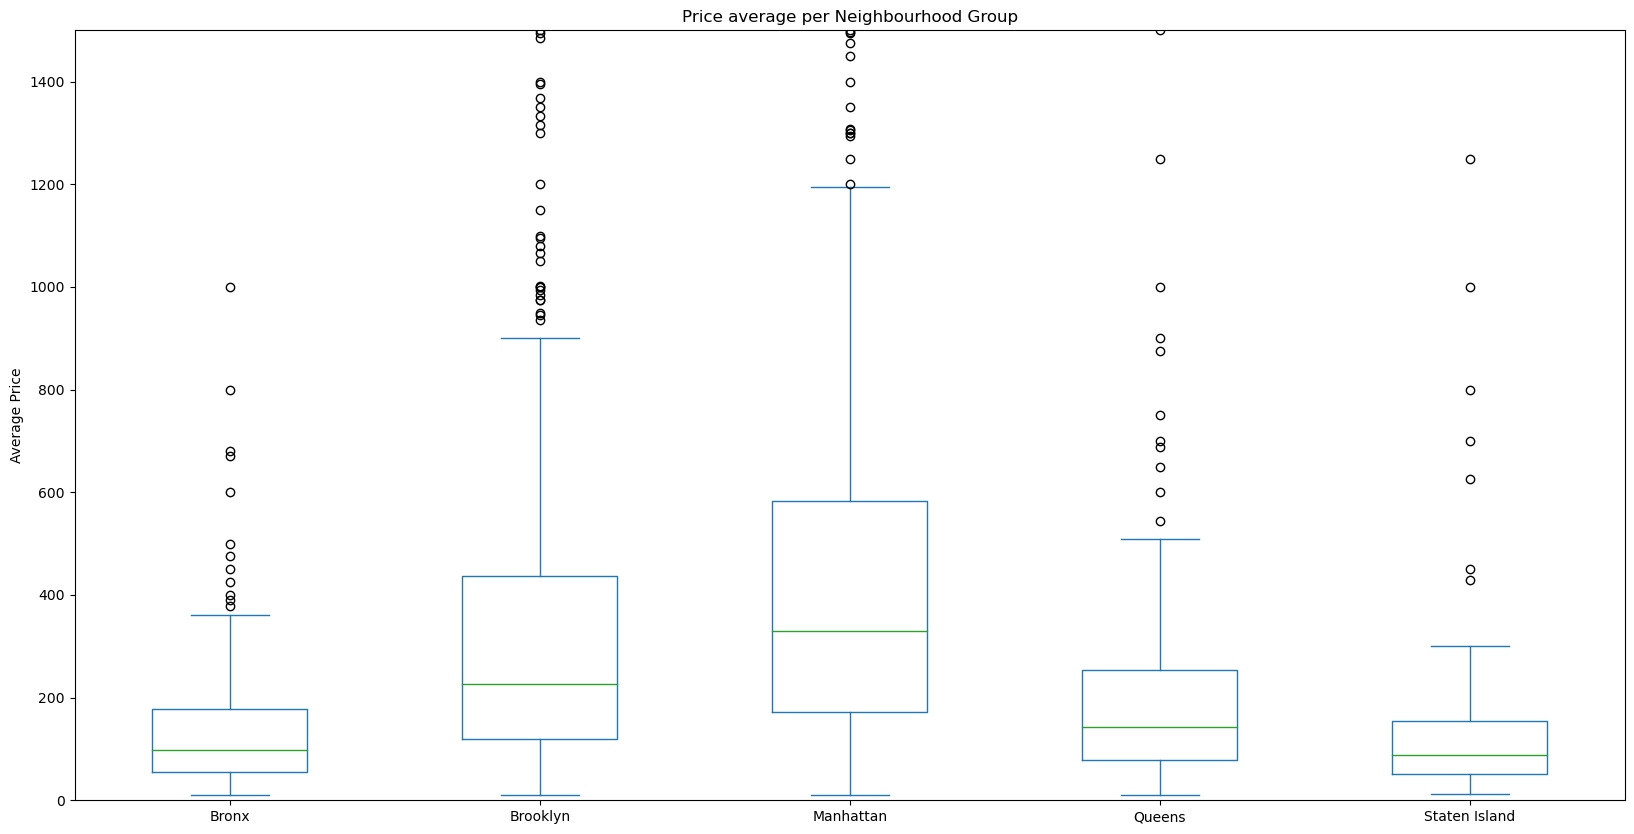

In [15]:
price_per_listing_df.plot(kind='box',figsize=(20,10),ylim=(0,1500),xlabel='Neighbourhood Group',ylabel='Average Price',title='Price average per Neighbourhood Group')

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

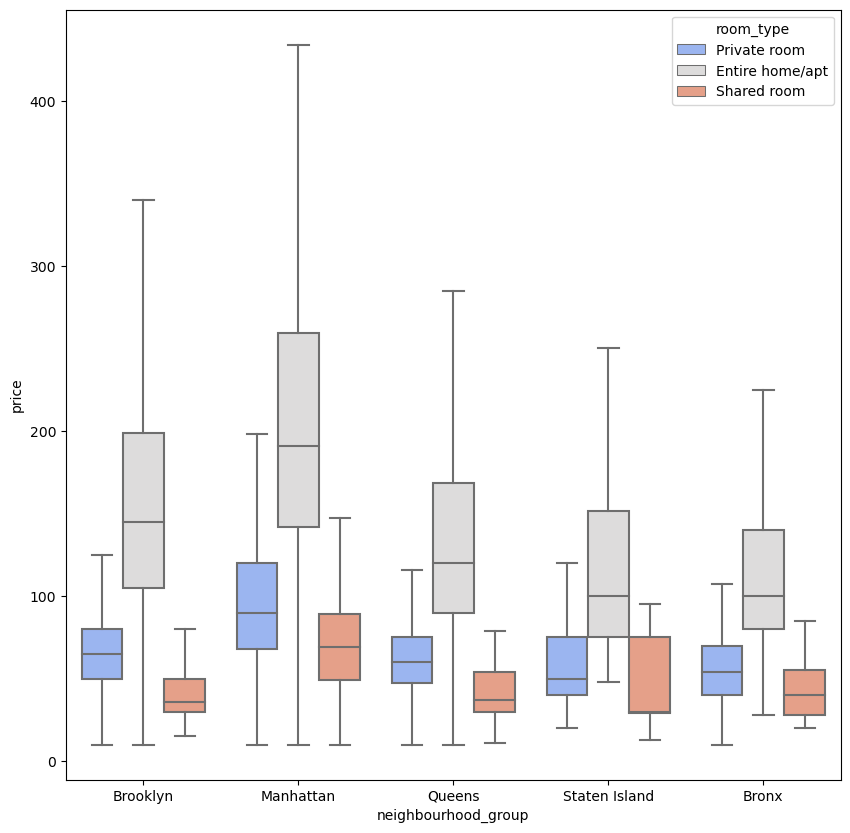

In [16]:
plt.figure(figsize=(10,10))

sns.boxplot(y='price',x='neighbourhood_group',
            hue='room_type',data=df_main , showfliers=False , palette="coolwarm")

# Conclusion 3:
# Average prices are highest in Manhattan and we are also able to establish an understanding about price trends between different types of rooms in all neighbourhood groups.
# In most of the states accept Brooklyn many private and shared room type properties lie in same price range
# Entire home/apt are the costliest properties and difference between price ranges of Entire home/Apt and other types of rooms is quite significant in Brooklyn and Manhattan.

# Analysis 4: Number of listings of different room types in all areas.

<AxesSubplot:xlabel='room_type', ylabel='count'>

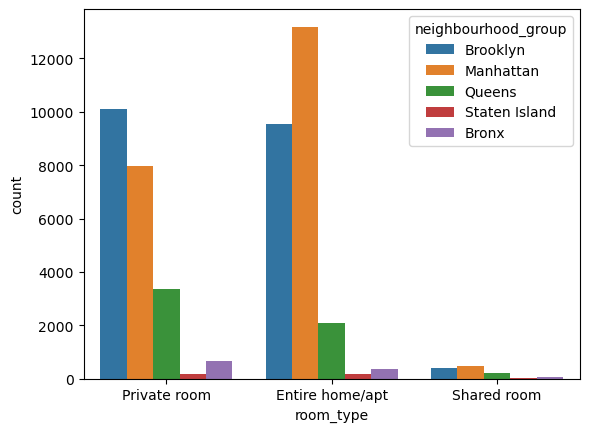

In [18]:
sns.countplot(x="room_type" ,data=df_main,hue='neighbourhood_group')

# Conclusion 4: 
# Private and Entire Apt types of listings are more common.
# Number of Private and Apt type of listings are same in all cities accept Manhatten which indicates Manhattan have culture of more costly types of listings.

# Analysis 5: What is popularity of properties in all areas based on the average customer review count.

<AxesSubplot:xlabel='room_type', ylabel='number_of_reviews'>

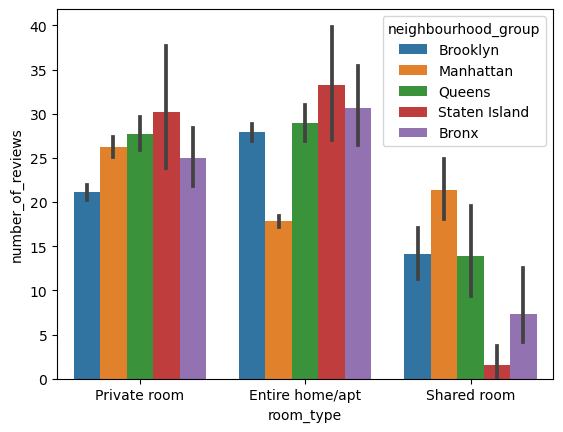

In [19]:
sns.barplot(x="room_type",y='number_of_reviews' ,data=df_main,hue='neighbourhood_group') 

# Conclusion 5: 
# Shared rooms from Manhattan are most popular type of properties whereas other type of rooms from State Islands are most popular.
# Shared rooms are less popular.

# Analysis 6: What price range rooms are more preferred by customers based on number of reviews.

<AxesSubplot:xlabel='price', ylabel='number_of_reviews'>

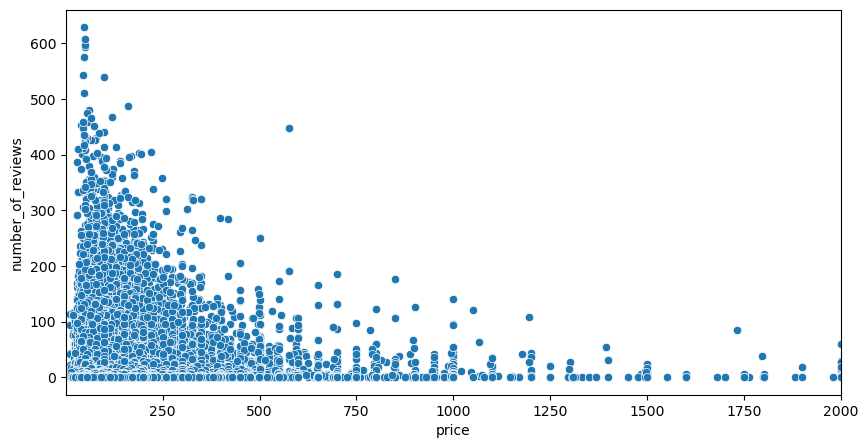

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlim([1,2000])
sns.scatterplot(y="number_of_reviews",x='price',data=df_main,ax=ax   ) 

# Conclusion 6: Rooms with price range upto 400 are most popular among customers.

# Final Takeaways from the analysis :
# 1. Customers prefer hotels with price upto 400 most.
# 2. Manhattan has costliest and most number of listings on Air Bnb but still listings from State Islands are more popular among customers.
# 3. Many of Private and Shared properties lie in same price range but very less number of shared listings are available in comparison to Private room type listings.
# 4. Manhattan and Brooklyns are largest contributors in count of listings.
# 5. Manhattan have highest number of listings of Entire Home/ Apt type of rooms which is even more than private rooms. It is an exceptional trend in comparison to other cities. Still popularity of private rooms is more.

# Technical Learnings-
# Seaborn is an library developed on top of Matplotlib with simplified Numpy Operations. Seaborn is also having battern in built support for graphs visualisation as it can be noticed between box plots created using Matplotlib and Seaborn for Analsyis # 2